## Fundamentals of Machine Learning Exercise 1a - Johannes Klüh, Vivienne Leidel, Denis Münch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Data Creation and Visualization

$p(X=x|Y=0) = 2-2x$. cdf: $F(x) = 2x-x^2$. Inverse: $x = F^{-1}(u) = 1 - \sqrt{1-u}$. Second solution $x = F^{-1}(u) = \sqrt{1-u} + 1$ can be discarded because $X\in[0,1]$.

$p(X=x|Y=1) = 2x$. cdf: $F(x) = x^2$. Inverse: $x = F^{-1}(u) = \sqrt{u}$.

In [ ]:
def create_data(N):
    labels = np.random.choice(np.array([0,1]), N)
    us = np.random.random_sample(labels.shape)
    data = np.zeros_like(labels, dtype='f')
    data[labels==0], data[labels==1] = 1-np.sqrt(1-us[labels==0]), np.sqrt(us[labels==1])
    return data, labels # data X and labels Y

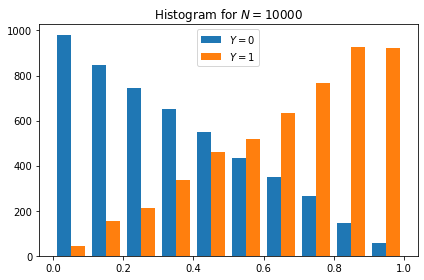

In [ ]:
x, y = create_data(10000)

fig, ax = plt.subplots(tight_layout=True)
ax.set_title('Histogram for $N = 10000$')
ax.hist([x[y == 0], x[y == 1]], 10, label=['0', '1'])
ax.legend(['$Y = 0$', '$Y = 1$'])

plt.show()

### 1.2 Classification by Thresholding

In [ ]:
def geq(a, b):
    return a >= b

def lt(a,b):
    return a < b

def error_rate_a(threshold):
    return 0.25 + (threshold - 0.5)**2

def error_rate_b(threshold):
    return 0.75 - (threshold - 0.5)**2

In [ ]:
def plt_mean_std(rule, Ms, thresholds, error_rate_f, threshold_f):
    fig, axs = plt.subplots(1,len(thresholds), figsize=(12,4))

    for i, threshold in enumerate(thresholds):
        error_rate = error_rate_f(threshold) # calculate error rate for threshold
        means = []
        stds = []
        for M in Ms:
            errors = []
            for _ in range(10):
                x, y = create_data(M)
                yhat = np.zeros_like(y)
                yhat[threshold_f(x, threshold)] = 1 # apply threshold classifier
                errors.append((y!=yhat).sum()/M)
                
            errors = np.array(errors) # convert for mean, std calculation

            means.append(errors.mean())
            stds.append(errors.std())

        # plot mean, std and error rate
        axs[i].errorbar(Ms, means, stds, label=f'$\mu, \sigma$ for $x_t = {threshold}$')
        axs[i].scatter(Ms, [error_rate]*len(Ms), marker='x', label=f'$p(error|{rule};{threshold})$')
        axs[i].set_xscale('log')
        axs[i].legend()

    plt.suptitle(f'Rule {rule}')
    plt.show()

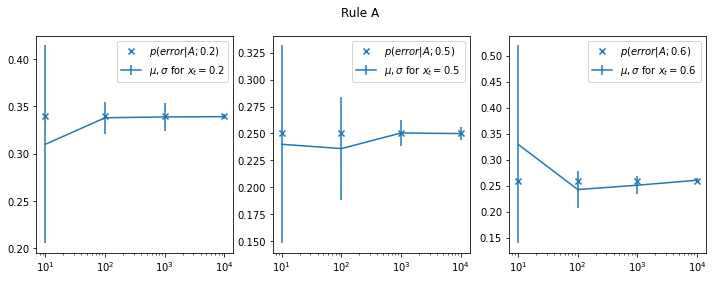

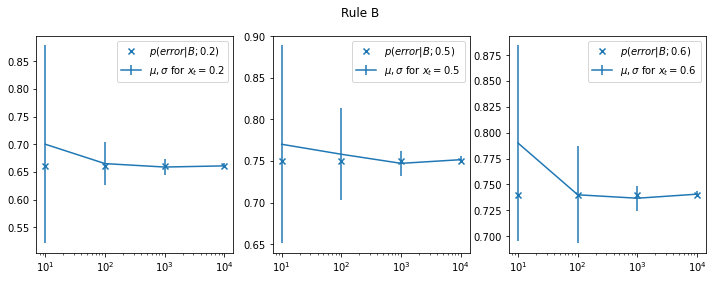

In [ ]:
thresholds = [0.2, 0.5, 0.6]
Ms = [10, 100, 1000, 10000]

plt_mean_std('A', Ms, thresholds, error_rate_a, geq)
plt_mean_std('B', Ms, thresholds, error_rate_b, lt)

### 1.3 Baseline Classifiers

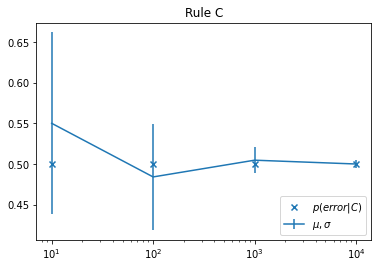

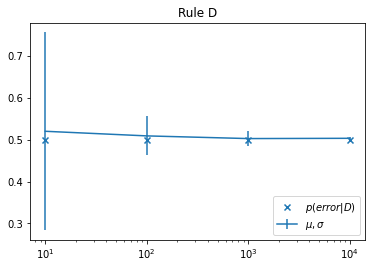

In [ ]:
Ms = [10, 100, 1000, 10000]

fig = plt.figure(figsize=(6,4))

means = []
stds = []
for M in Ms:
    errors_a = []
    for _ in range(10):
        x, y = create_data(M)
        yhat = np.random.choice([0,1], y.shape)
        errors_a.append((y!=yhat).sum()/M)
        
    errors_a = np.array(errors_a)

    means.append(errors_a.mean())
    stds.append(errors_a.std())

plt.errorbar(Ms, means, stds, label=f'$\mu, \sigma$')
plt.scatter(Ms, [0.5]*len(Ms), marker='x', label=f'$p(error|C)$')
plt.xscale('log')

plt.plot()
plt.legend(loc='lower right')
plt.title('Rule C')
plt.show()


fig = plt.figure(figsize=(6,4))

means = []
stds = []
for M in Ms:
    errors_a = []
    for _ in range(10):
        x, y = create_data(M)
        yhat = np.ones_like(y)
        errors_a.append((y!=yhat).sum()/M)
        
    errors_a = np.array(errors_a)

    means.append(errors_a.mean())
    stds.append(errors_a.std())

plt.errorbar(Ms, means, stds, label=f'$\mu, \sigma$')
plt.scatter(Ms, [0.5]*len(Ms), marker='x', label=f'$p(error|D)$')
plt.xscale('log')

plt.plot()
plt.legend(loc='lower right')
plt.title('Rule D')
plt.show()

### 1.4 Nearest Neighbor Classification

In [ ]:
def n2_create_data():
    i = 0
    while True and i < 100:
        x,y = create_data(2)
        if y.sum() == 1:
            return x, y
        i += 1

def nearest_neighbor(train_x, train_y):
    def nn(x):
        distances = np.abs(train_x[None] - x[:,None])
        indices = np.argmin(distances, axis=1)
        return train_y[indices]
    return nn



M = 100

print('N = 2')
errors = []
for _ in range(100):
    train_x, train_y = n2_create_data()
    nn = nearest_neighbor(train_x, train_y)

    test_x, test_y = create_data(M)
    predicted_y = nn(test_x)
    errors.append((test_y!=predicted_y).sum()/M)

errors = np.array(errors)
print(f'mean: {errors.mean():.3f}, std: {errors.std():.3f}')


print('\nN = 100')
errors = []
for _ in range(100):
    train_x, train_y = create_data(100)
    nn = nearest_neighbor(train_x, train_y)

    test_x, test_y = create_data(M)
    predicted_y = nn(test_x)
    errors.append((test_y!=predicted_y).sum()/M)

errors = np.array(errors)
print(f'mean: {errors.mean():.3f}, std: {errors.std():.3f}')

N = 2
mean: 0.347, std: 0.179

N = 100
mean: 0.337, std: 0.047
